## Generates a Random Erdos Renyi Weighted Graph

https://networkx.org/documentation/stable/auto_examples/graph/plot_erdos_renyi.html#sphx-glr-auto-examples-graph-plot-erdos-renyi-py 

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import random


def generate_benchmark(width=25, height=20, n=50, m=120, seed=20160):
    #n is number of nodes and m is no of edges
    plt.rcParams["figure.figsize"] = (25,20)
    n = 50 
    m = 120 
    seed = 20160
    random.seed(seed)
    G = nx.gnm_random_graph(n, m, seed=seed)

    for edge in G.edges():
        wt = random.randint(1,7)
        G[edge[0]][edge[1]]['weight'] = wt

    return G

def plot_benchmark(G, showedgewt = False): 
    pos = nx.spring_layout(G) 
    nx.draw_networkx(G, pos=pos, node_size=30, width=0.7)
    if showedgewt:
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    plt.show()

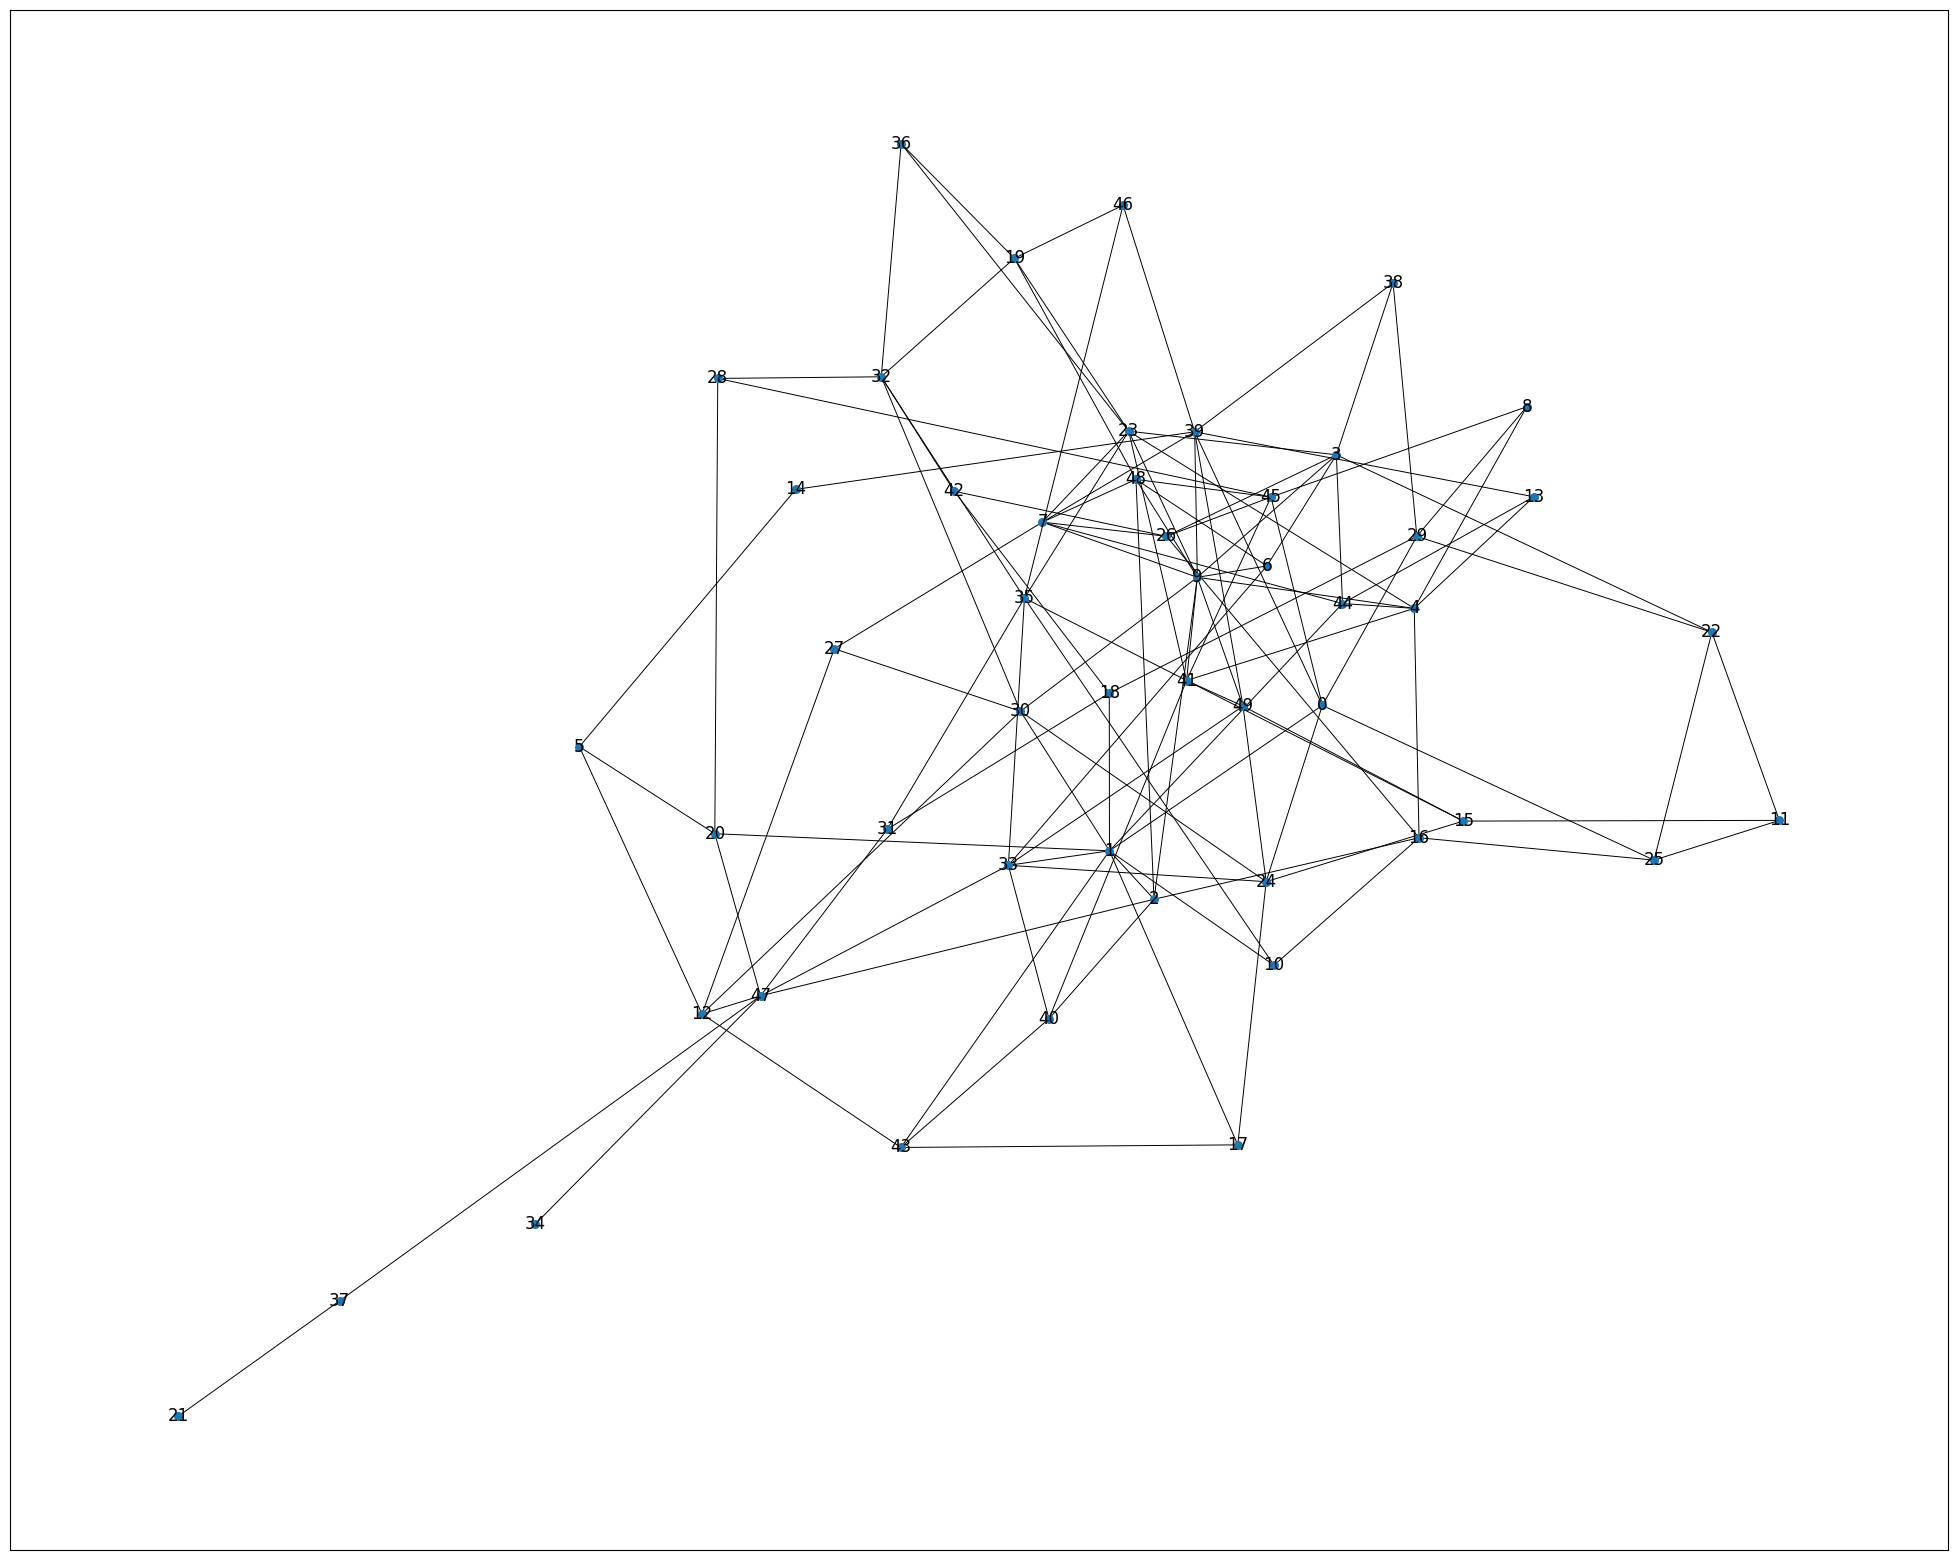

In [12]:
graph = generate_benchmark()
plot_benchmark(graph)

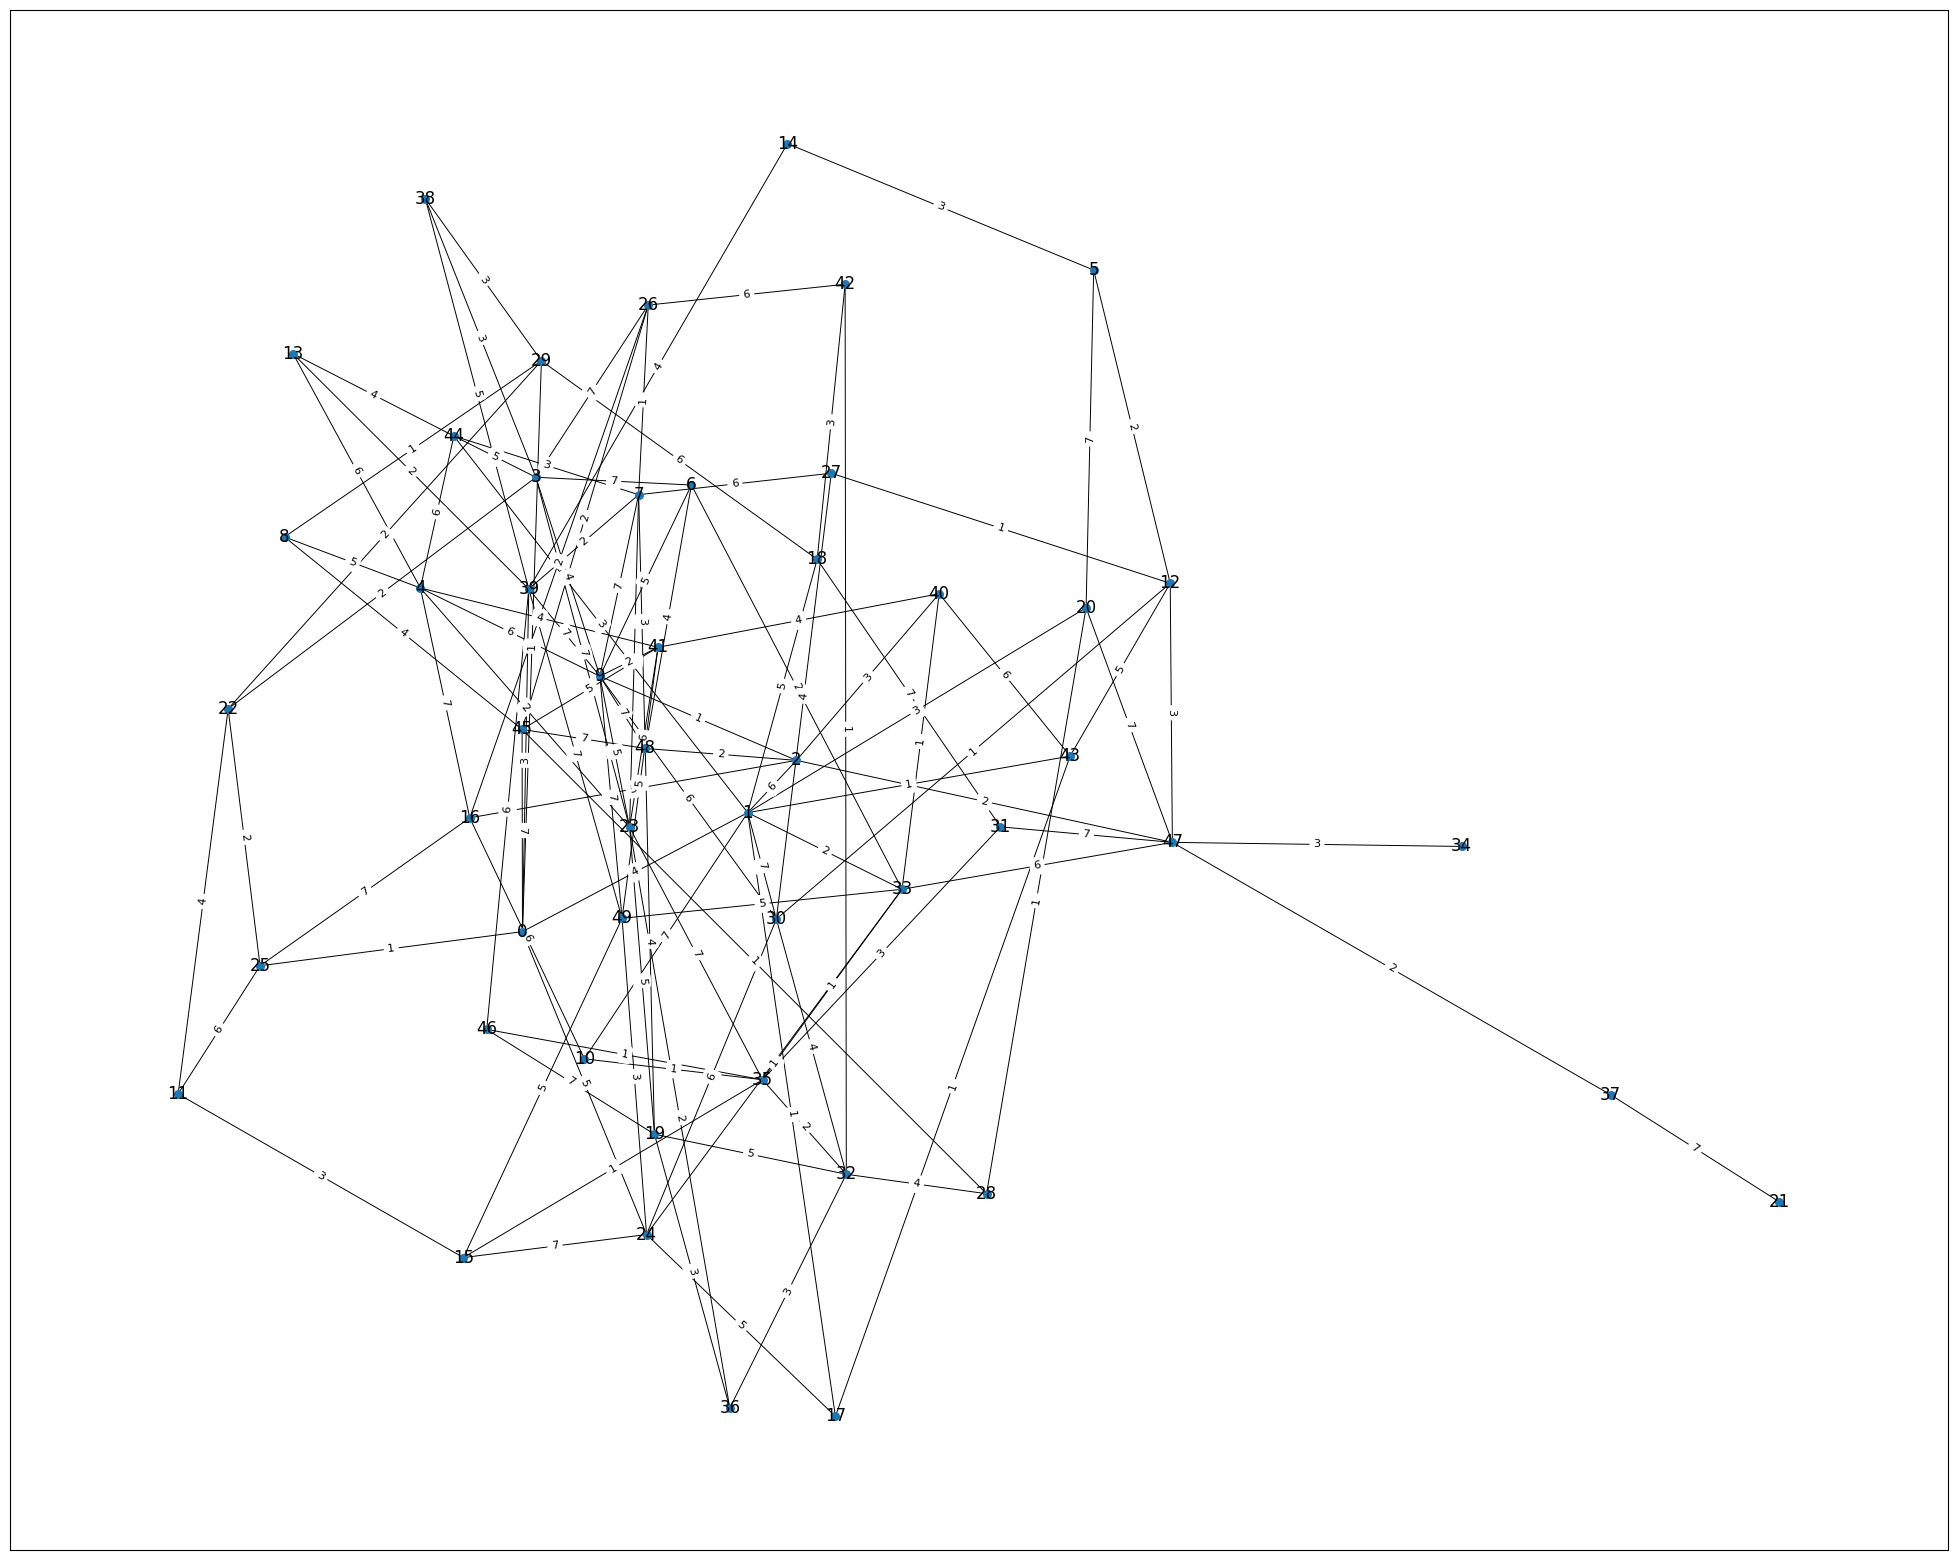

In [13]:
graph = generate_benchmark()
plot_benchmark(graph, True)